In [2]:
import giraffe
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
expression = pd.read_csv("data/breast/raw/expression.csv", index_col = 0)
motif = pd.read_csv("data/breast/motif.csv", index_col = 0)
ppi = pd.read_csv("data/breast/ppi_matrix.csv", index_col = 0)

## OTTER

### Standard, 60 iterations

In [4]:
R = algo(motif.T.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), np.corrcoef(expression.to_numpy())).T

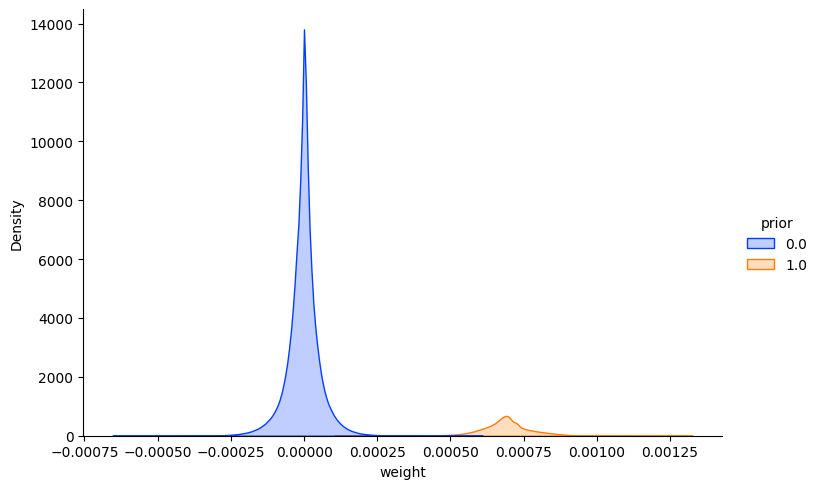

In [5]:
W = pd.DataFrame(np.c_[R.flatten(), motif.to_numpy().flatten()], columns = ['weight', 'prior'])
sns.displot(data=W, x='weight', hue='prior', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

### 300 iterations

In [4]:
R = algo(motif.T.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), np.corrcoef(expression.to_numpy()), Iter = 300).T

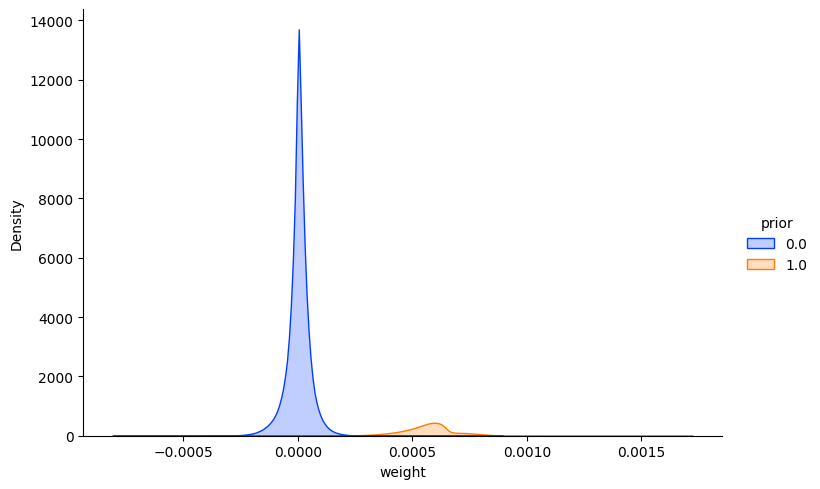

In [5]:
W = pd.DataFrame(np.c_[R.flatten(), motif.to_numpy().flatten()], columns = ['weight', 'prior'])
sns.displot(data=W, x='weight', hue='prior', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

### 1000 iterations

In [19]:
R = algo(motif.T.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), np.corrcoef(expression.to_numpy()), Iter = 1000).T

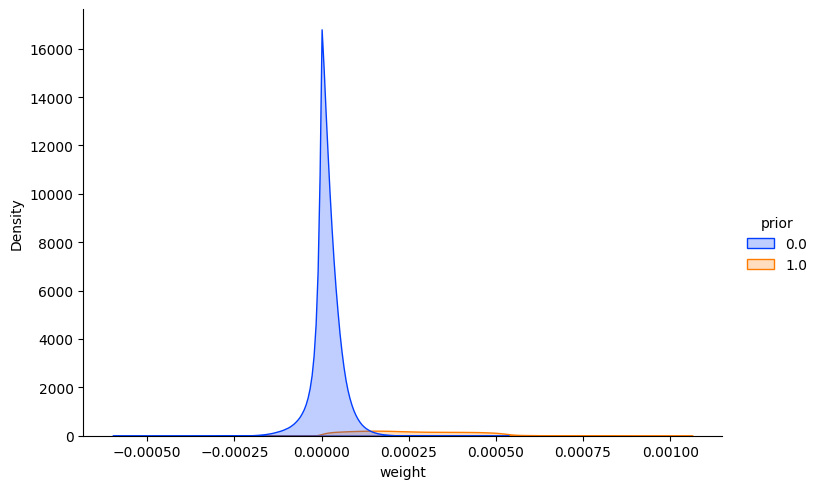

In [20]:
W = pd.DataFrame(np.c_[R.flatten(), motif.to_numpy().flatten()], columns = ['weight', 'prior'])
sns.displot(data=W, x='weight', hue='prior', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

### Garcia Alonso

In [21]:
cache = True

In [22]:
if cache:
    prior_cont1 = pd.read_csv("data/priors/garcia_alonso_motif.csv", index_col = 0)
else:
    translate = pd.read_csv("data/prostate/raw/gen_v26_mapping.csv", index_col = 0)
    cont1 = pd.read_csv("data/priors/garcia_alonso.csv", index_col = 0)
    M = {}
    for g in cont1.columns:
        gene = list(translate[translate['gene_name'] == g]['gene_id'])
        if len(gene) == 1:
            gene = gene[0][0:15]
            M[g] = gene
    prior_cont1 = pd.DataFrame(0, index = motif.index, columns = motif.columns)
    for tf in cont1.index:
        if tf not in prior_cont1.columns:
            continue
        for g in cont1.columns:
            if g not in M.keys():
                continue
            gene = M[g]
            if gene not in prior_cont1.index:
                continue
            prior_cont1.loc[gene, tf] = cont1.loc[tf, g]
    prior_cont1.to_csv("data/priors/garcia_alonso_motif.csv")

In [25]:
from sklearn.preprocessing import normalize
prior_cont1 = normalize(prior_cont1, axis=0, norm='max')

In [28]:
R = algo(prior_cont1.T, ppi.to_numpy() + np.eye(ppi.shape[0]), np.corrcoef(expression.to_numpy())).T

In [31]:
a = prior_cont1
mean = np.mean(prior_cont1)
a[a <= mean] = 0
a[a > mean] = 1

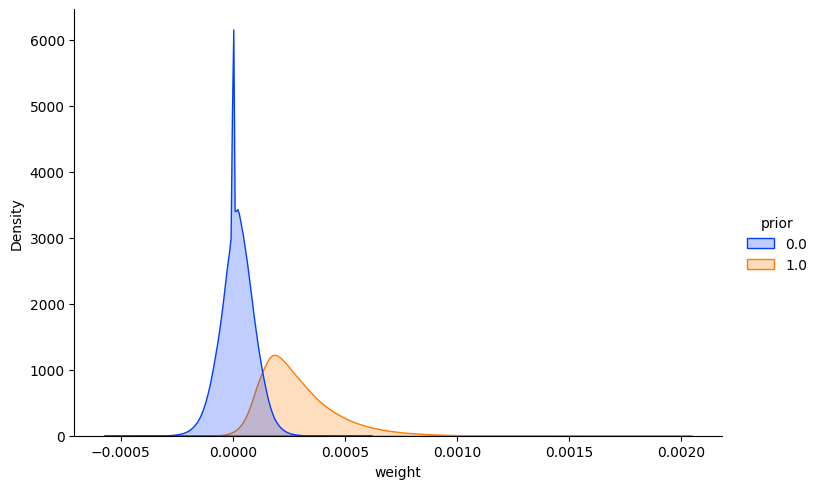

In [32]:
W = pd.DataFrame(np.c_[R.flatten(), a.flatten()], columns = ['weight', 'prior'])
sns.displot(data=W, x='weight', hue='prior', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

## GIRAFFE

### Binary prior, 50 iterations

In [8]:
R = giraffe.Giraffe(expression.to_numpy(), motif.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), iterations = 50, save_computation = True).get_regulation()

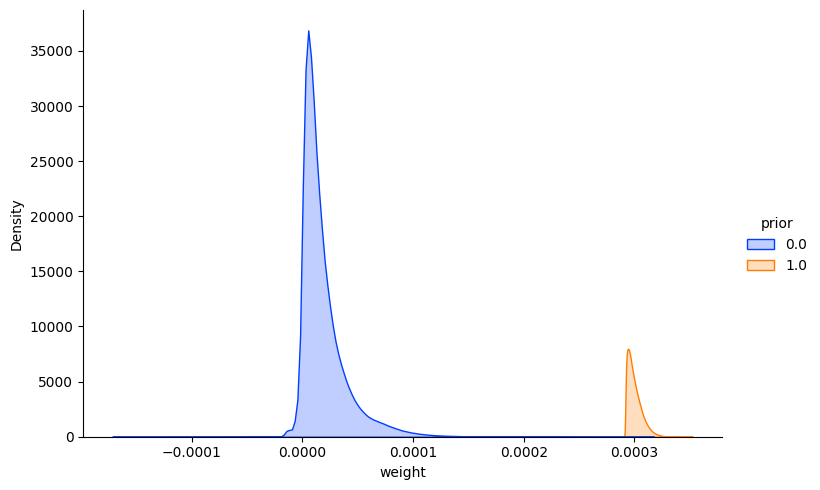

In [9]:
W = pd.DataFrame(np.c_[R.flatten(), motif.to_numpy().flatten()], columns = ['weight', 'prior'])
sns.displot(data=W, x='weight', hue='prior', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

### Binary prior, 120 iterations

In [12]:
R = giraffe.Giraffe(expression.to_numpy(), motif.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), iterations = 120, save_computation = True).get_regulation()

In [ ]:
Weight, prior, chip-seq


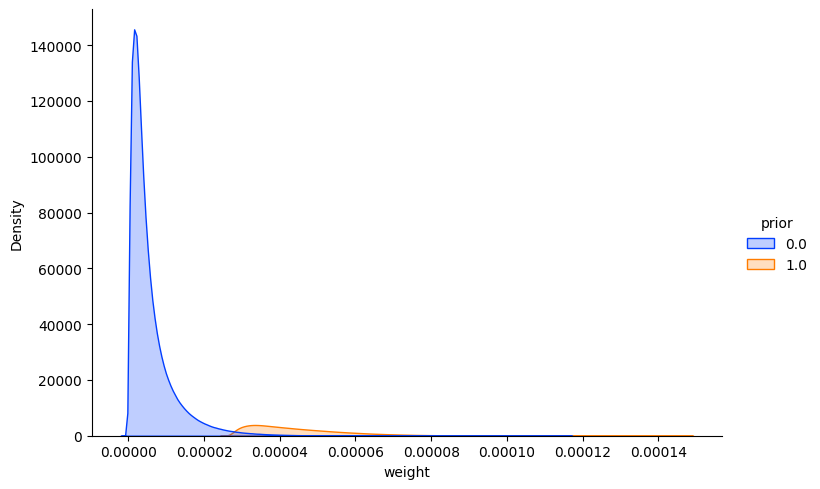

In [13]:
W = pd.DataFrame(np.c_[R.flatten(), motif.to_numpy().flatten()], columns = ['weight', 'prior'])
sns.displot(data=W, x='weight', hue='prior', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

### Binary prior, 200 iterations

In [6]:
R = giraffe.Giraffe(expression.to_numpy(), motif.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), save_computation = True).get_regulation()

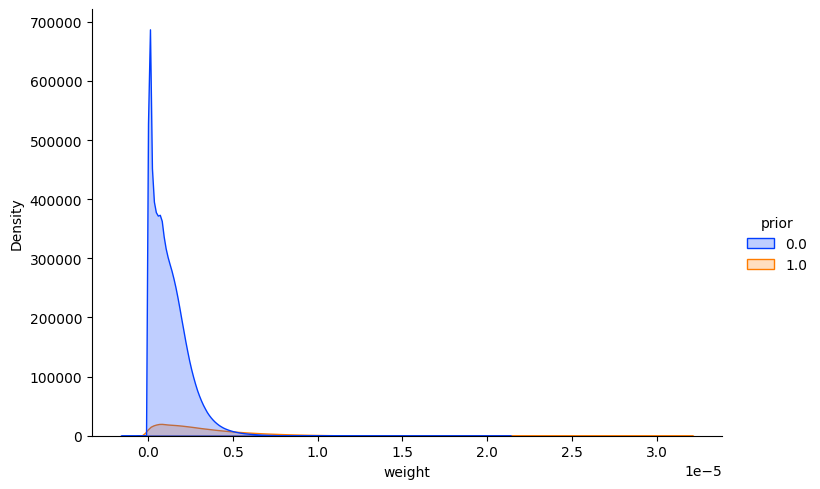

In [7]:
W = pd.DataFrame(np.c_[R.flatten(), motif.to_numpy().flatten()], columns = ['weight', 'prior'])
sns.displot(data=W, x='weight', hue='prior', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

### Garcia Alonso model, 50 iterations

In [15]:
cache = True

In [16]:
if cache:
    prior_cont1 = pd.read_csv("data/priors/garcia_alonso_motif.csv", index_col = 0)
else:
    translate = pd.read_csv("data/prostate/raw/gen_v26_mapping.csv", index_col = 0)
    cont1 = pd.read_csv("data/priors/garcia_alonso.csv", index_col = 0)
    M = {}
    for g in cont1.columns:
        gene = list(translate[translate['gene_name'] == g]['gene_id'])
        if len(gene) == 1:
            gene = gene[0][0:15]
            M[g] = gene
    prior_cont1 = pd.DataFrame(0, index = motif.index, columns = motif.columns)
    for tf in cont1.index:
        if tf not in prior_cont1.columns:
            continue
        for g in cont1.columns:
            if g not in M.keys():
                continue
            gene = M[g]
            if gene not in prior_cont1.index:
                continue
            prior_cont1.loc[gene, tf] = cont1.loc[tf, g]
    prior_cont1.to_csv("data/priors/garcia_alonso_motif.csv")

In [17]:
from sklearn.preprocessing import normalize
prior_cont1 = normalize(prior_cont1, axis=0, norm='max')

In [18]:
R = giraffe.Giraffe(expression.to_numpy(), prior_cont1, ppi.to_numpy() + np.eye(ppi.shape[0]), iterations = 50, save_computation = True).get_regulation()

In [19]:
from scipy import stats
a = prior_cont1
mean = stats.trim_mean(prior_cont1, .05)
a[a <= mean] = 0
a[a > mean] = 1

In [21]:
l = np.quantile(R, 0.05)
r = np.quantile(R, 0.95)
print(l)
print(r)

-3.198275931026727e-06
0.0001314513210672883


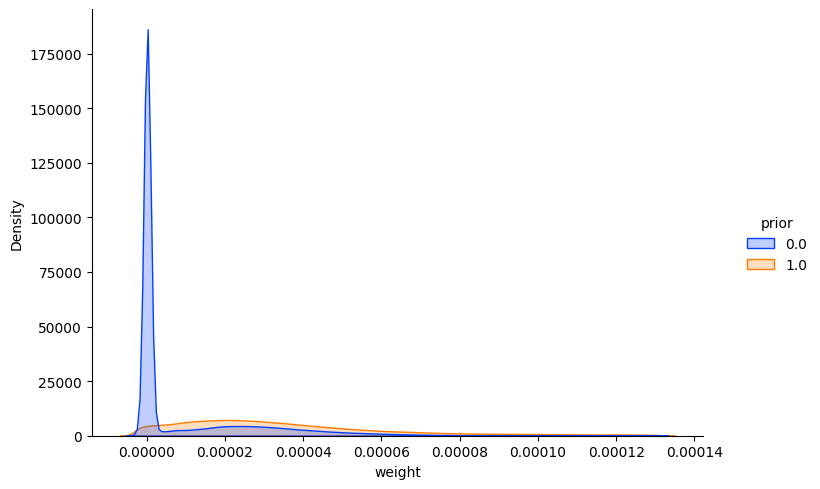

In [22]:
W = pd.DataFrame(np.c_[R.flatten(), a.flatten()], columns = ['weight', 'prior'])
W = W.query('weight >= -3.198275931026727e-06 & weight <= 0.0001314513210672883')
sns.displot(data=W, x='weight', hue='prior', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

### Garcia Alonso model, 200 iterations

In [3]:
cache = True

In [9]:
if cache:
    prior_cont1 = pd.read_csv("data/priors/garcia_alonso_motif.csv", index_col = 0)
else:
    translate = pd.read_csv("data/prostate/raw/gen_v26_mapping.csv", index_col = 0)
    cont1 = pd.read_csv("data/priors/garcia_alonso.csv", index_col = 0)
    M = {}
    for g in cont1.columns:
        gene = list(translate[translate['gene_name'] == g]['gene_id'])
        if len(gene) == 1:
            gene = gene[0][0:15]
            M[g] = gene
    prior_cont1 = pd.DataFrame(0, index = motif.index, columns = motif.columns)
    for tf in cont1.index:
        if tf not in prior_cont1.columns:
            continue
        for g in cont1.columns:
            if g not in M.keys():
                continue
            gene = M[g]
            if gene not in prior_cont1.index:
                continue
            prior_cont1.loc[gene, tf] = cont1.loc[tf, g]
    prior_cont1.to_csv("data/priors/garcia_alonso_motif.csv")

In [10]:
from sklearn.preprocessing import normalize
prior_cont1 = normalize(prior_cont1, axis=0, norm='max')

In [11]:
R = giraffe.Giraffe(expression.to_numpy(), prior_cont1, ppi.to_numpy() + np.eye(ppi.shape[0]), save_computation = True).get_regulation()

In [12]:
l = np.quantile(R, 0.05)
r = np.quantile(R, 0.95)
print(l)
print(r)

4.2570706781930316e-08
4.592501886691025e-06


In [13]:
from scipy import stats
a = prior_cont1
mean = stats.trim_mean(prior_cont1, .05)
a[a <= mean] = 0
a[a > mean] = 1

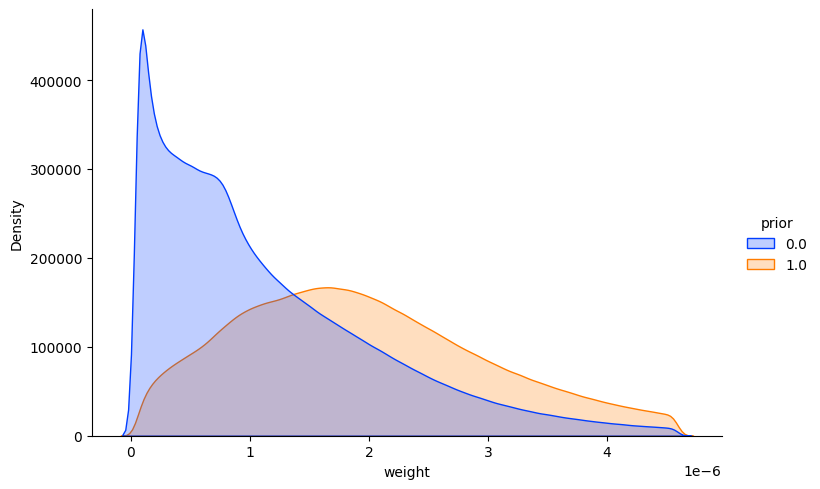

In [14]:
W = pd.DataFrame(np.c_[R.flatten(), a.flatten()], columns = ['weight', 'prior'])
W = W.query('weight >= 4.2570706781930316e-08 & weight <= 4.592501886691025e-06')
sns.displot(data=W, x='weight', hue='prior', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

### Ouyang

In [23]:
cache = True

In [24]:
if cache:
    prior_cont2 = pd.read_csv("data/priors/ouyang_motif.csv", index_col = 0)
else:
    translate = pd.read_csv("data/prostate/raw/gen_v26_mapping.csv", index_col = 0)
    cont2 = pd.read_csv("data/priors/ouyang.csv", index_col = 0)
    M = {}
    for g in cont2.columns:
        gene = list(translate[translate['gene_name'] == g]['gene_id'])
        if len(gene) == 1:
            gene = gene[0][0:15]
            M[g] = gene
    prior_cont2 = pd.DataFrame(0, index = motif.index, columns = motif.columns)
    for tf in cont2.index:
        if tf not in prior_cont2.columns:
            continue
        for g in cont2.columns:
            if g not in M.keys():
                continue
            gene = M[g]
            if gene not in prior_cont2.index:
                continue
            prior_cont2.loc[gene, tf] = cont2.loc[tf, g]
    prior_cont2.to_csv("data/priors/ouyang_motif.csv")

In [26]:
R = giraffe.Giraffe(expression.to_numpy(), prior_cont2.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), iterations = 100, save_computation = True).get_regulation()

In [27]:
l = np.quantile(R, 0.05)
r = np.quantile(R, 0.95)
print(l)
print(r)

-1.5487003111047664e-07
3.128992957499576e-05


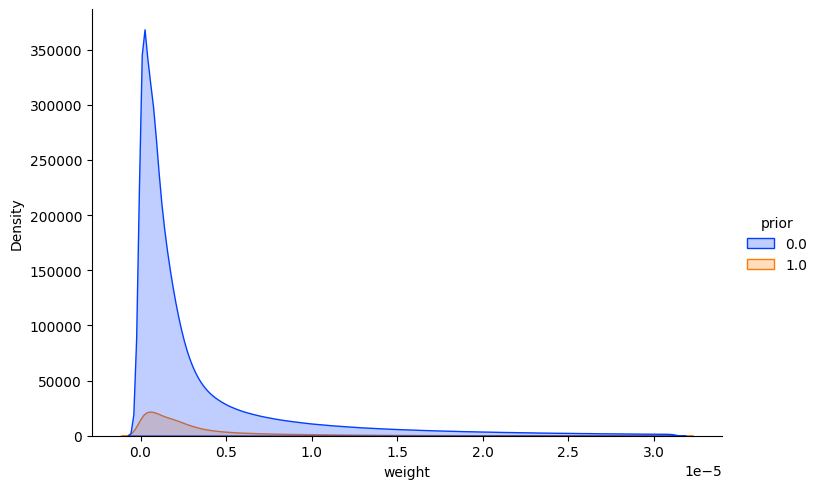

In [28]:
W = pd.DataFrame(np.c_[R.flatten(), motif.to_numpy().flatten()], columns = ['weight', 'prior'])
W = W.query('weight >= -1.5487003111047664e-07 & weight <= 3.128992957499576e-05')
sns.displot(data=W, x='weight', hue='prior', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

In [3]:
import numpy as np
from math import sqrt


def algo(W, P, C, lam=0.035, gamma=0.335, Iter=60, eta=0.00001, bexp=1):
    b1 = 0.9
    b2 = 0.999
    eps = 0.00000001
    b1t = b1 ** bexp
    b2t = b2 ** bexp

    t, g = W.shape

    W = W / np.sqrt(np.trace(W @ W.T))
    P = P / np.trace(P)

    P = P * (-(1 - lam)) + gamma * np.identity(t)
    
    m = np.zeros((t, g))
    v = np.zeros((t, g))
    
    for i in range(Iter):
        grad = W @ W.T @ W + P @ W + W @ C
        m = b1 * m + (4 * (1 - b1)) * grad
        v = b2 * v + (16 * (1 - b2)) * grad ** 2
        b1t = b1t * b1
        b2t = b2t * b2
        alpha = eta * sqrt(1 - b2t) / (1 - b1t)
        epst = eps * sqrt((1 - b2t))
        W = W - alpha * (m / (epst + np.sqrt(v)))
    return W
